<a href="https://colab.research.google.com/github/andrewpkitchin/time-series/blob/main/intro_to_autoregressive_processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Autoregressive Processes

We will look at a few basic autoregressive processes.

An autoregressive process of order 1, abbreviated as AR(1), is a basic type of time series model used in statistics and signal processing to describe certain stochastic processes.

The AR(1) model is defined by an equation that expresses a variable at time t as a linear function of the previous step in the process plus some random data.

Here’s the prototypical example of an AR(1):

y_t = a y_{t-1} + e_t

The term “e_t” is drawn from a normal distribution with mean 0 and standard deviation sigma^2.

In [ ]:
# Dependacies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def auto_r_one(n, y_0, mu, sigma, coeff, seed):
# Parameters
# Number of points in the time series
# Initial value of the series
# Mean of the error term
# Standard deviation of the error term

  # Initialize the series
  y = np.zeros(n)
  y[0] = y_0

  # Generate the time series
  np.random.seed(seed)  # For reproducibility
  for t in range(1, n):
    y[t] = coeff * y[t-1] + np.random.normal(mu, sigma)
  return y

def auto_r_one_plot(y, coeff):
    # Plotting
    plt.figure(figsize=(14, 8))
    plt.plot(y, label='$y_t = {{{}}}y_{{t-1}} + e_t$'.format(coeff))
    plt.title('Time Series: $y_t = {{{}}}y_{{t-1}} + e_t$'.format(coeff))
    plt.xlabel('Time ($t$)')
    plt.ylabel('$y_t$')
    plt.legend()
    plt.grid(True)
    plt.show()

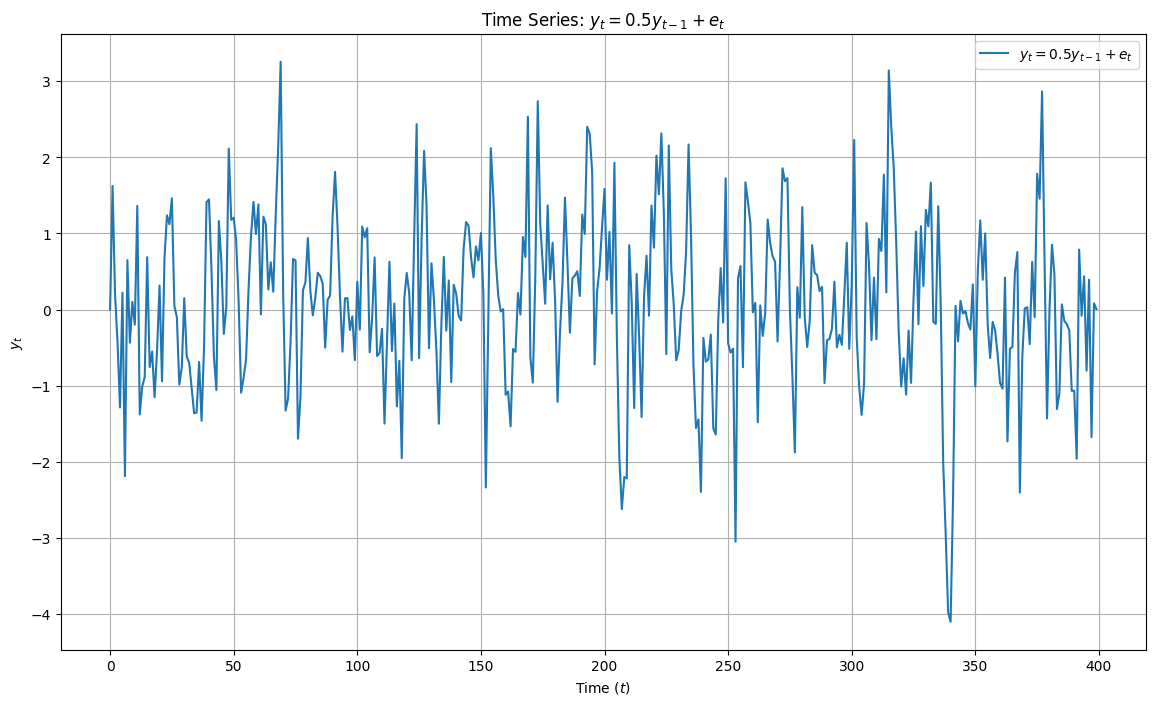

In [ ]:
auto_r_one_plot(auto_r_one(400, 0, 0, 1, 0.5, 1), 0.5)

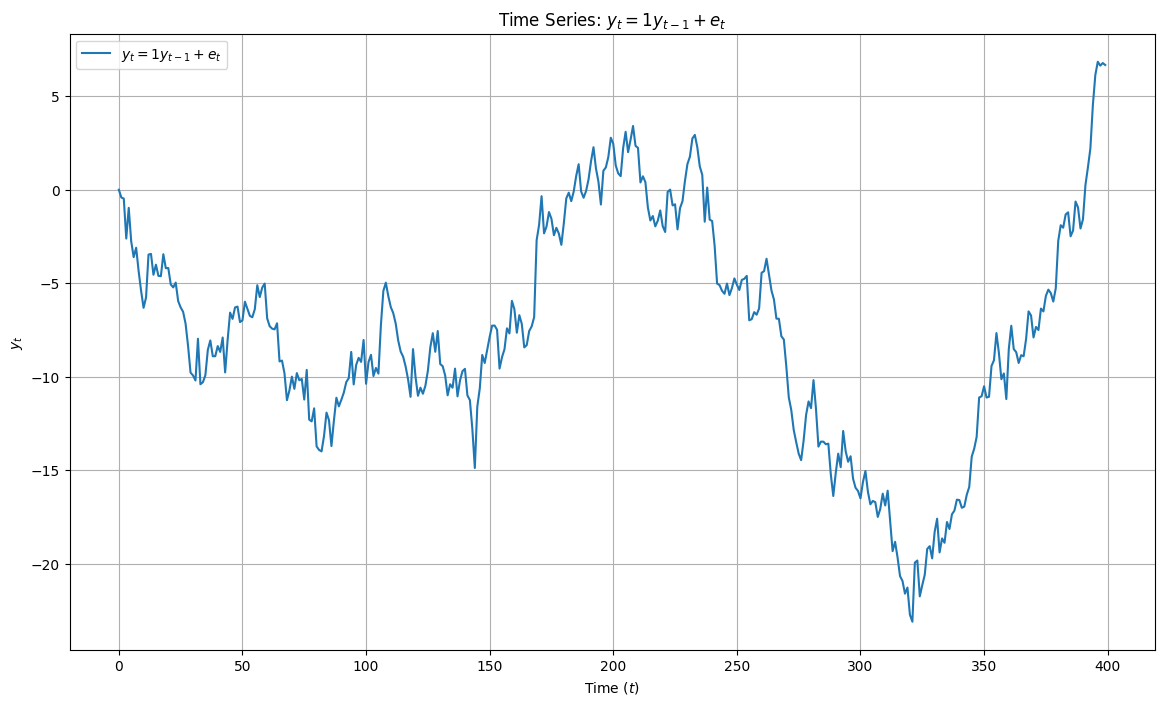

In [ ]:
auto_r_one_plot(auto_r_one(400, 0, 0, 1, 1, 2), 1)

# Decomposition

Let's explore a few simple operations to help us understand a time series.

Trend - We can think of the trend as the moving average of a window of vaules.

Seasonality refers to the repeating short-term cycle in the data. It is characterized by patterns that occur at regular intervals, such as daily, monthly, quarterly, or annually.

Residuals (or irregular component) are what remains after the trend and seasonal components have been removed from the time series. This component represents the randomness or noise in the data that cannot be attributed to the trend or seasonal effects.

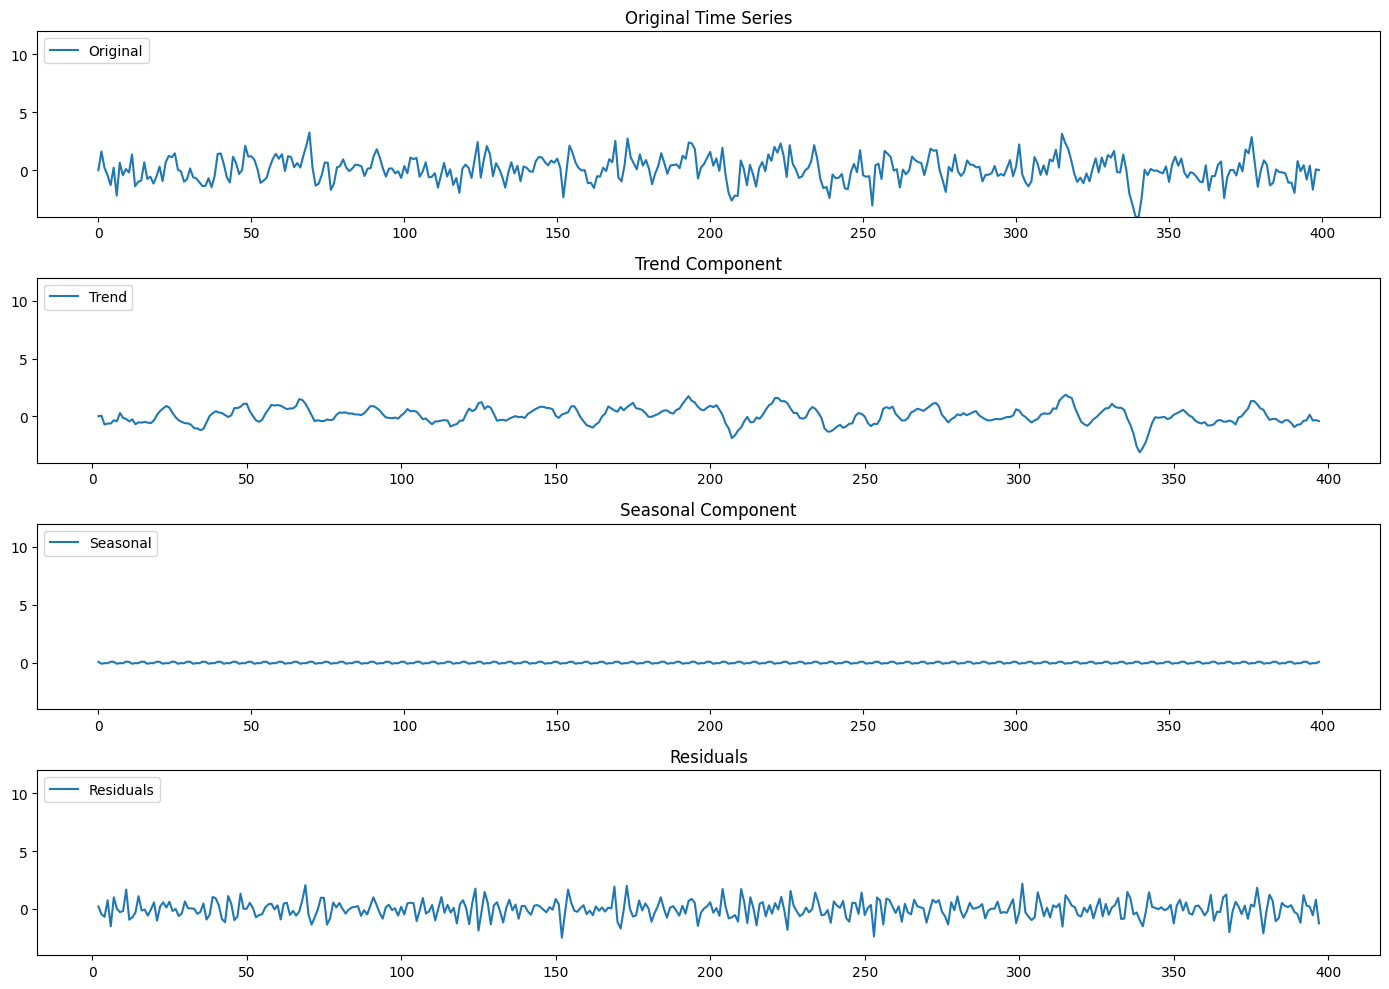

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the series
# The freq parameter is crucial for determining the seasonality component.
# We choose 12 for the length of the seasonal cycle.

y = auto_r_one(400, 0, 0, 1, 0.5, 1)

decomposition = seasonal_decompose(y, model='additive', period=5)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(y, label='Original')
plt.legend(loc='upper left')
plt.ylim(-4, 12)  # Set the y-axis limits between -4 and 12
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.ylim(-4, 12)  # Set the y-axis limits between -4 and 12
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.ylim(-4, 12)  # Set the y-axis limits between -4 and 12
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.ylim(-4, 12)  # Set the y-axis limits between -4 and 12
plt.title('Residuals')

plt.tight_layout()
plt.ylim(-4, 12)  # Set the y-axis limits between -4 and 12
plt.show()

# Stationary Series

A stationary series refers to a process whose statistical properties do not change over time. This means that the series remains constant in terms of its mean, variance, and autocorrelation structure for any period. In other words, how the data behaves (its pattern and spread) is consistent over time, making it easier to model and predict future values.

We can see that the mean and variance of the below time series are unstable over time.

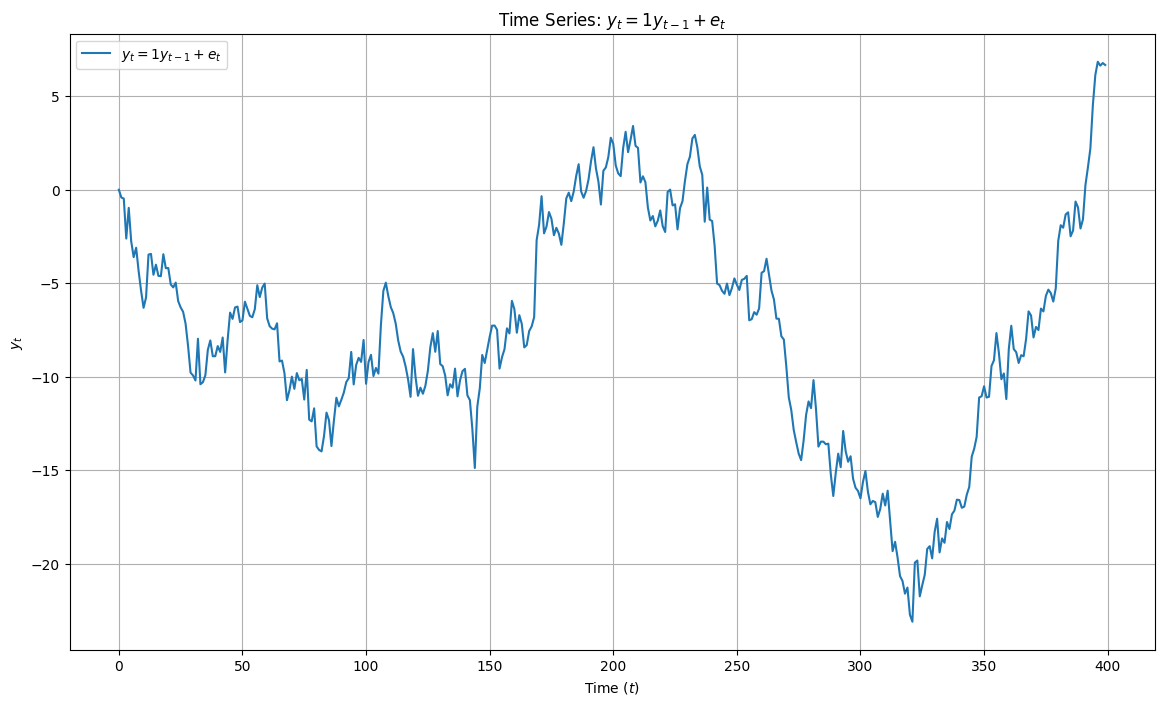

In [ ]:
auto_r_one_plot(auto_r_one(400, 0, 0, 1, 1, 2), 1)

With our next series, it is hard to make a conclusion about the mean and variance from inspection of the raw series data.

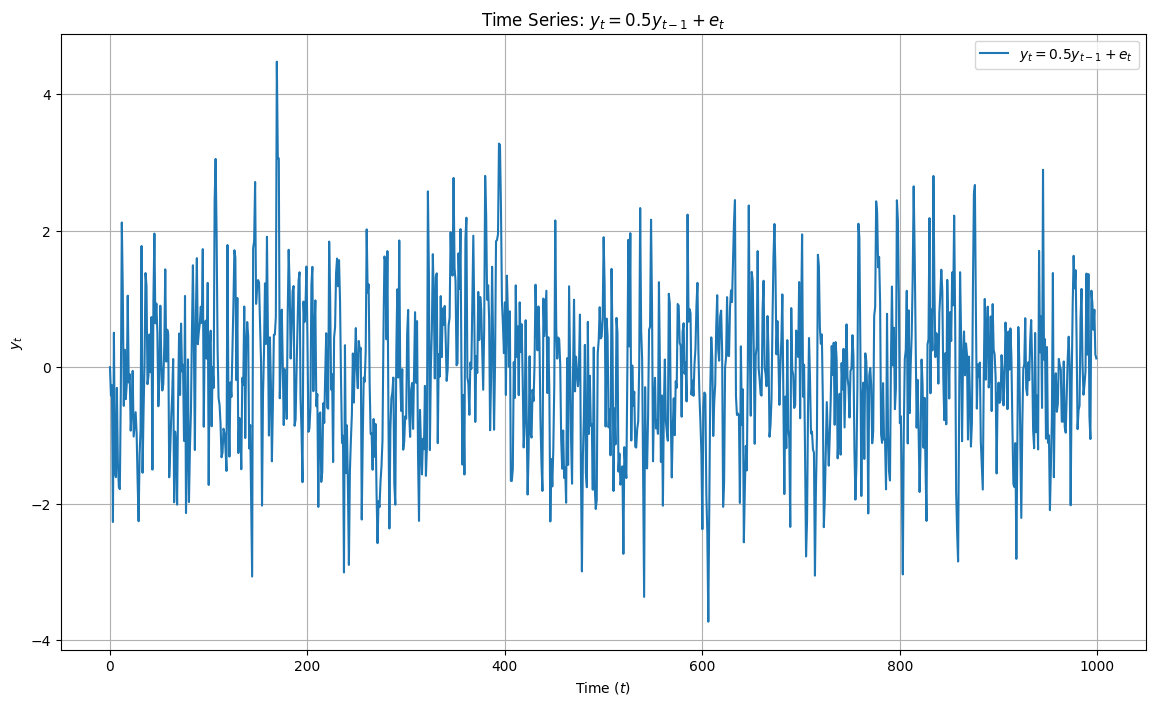

In [ ]:
auto_r_one_plot(auto_r_one(1000, 0, 0, 1, 0.5, 2), 0.5)

We can plot the rolling mean and variance to get a better idea.

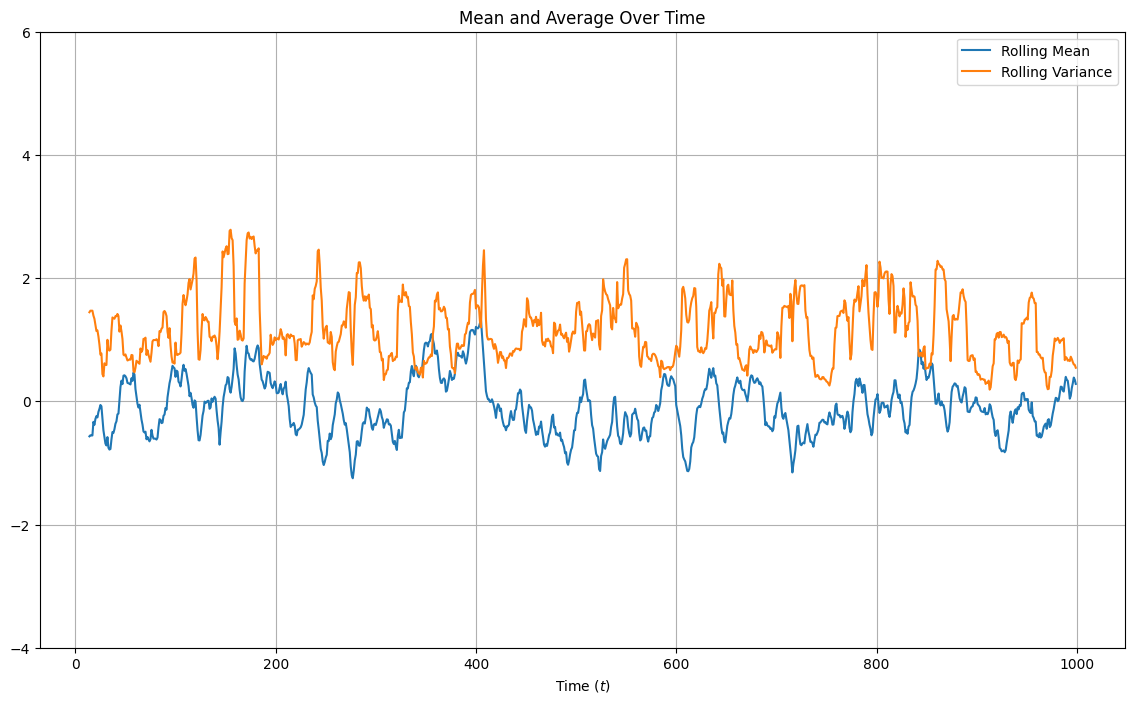

In [ ]:
y = auto_r_one(1000, 0, 0, 1, 0.5, 2)

y_series = pd.Series(y)

# Set the window size for rolling calculations
window_size = 15  # Adjust based on your needs

# Calculate rolling mean and rolling variance
rolling_mean = y_series.rolling(window=window_size).mean()
rolling_variance = y_series.rolling(window=window_size).var()


 # Plotting
plt.figure(figsize=(14, 8))
plt.plot(rolling_mean, label="Rolling Mean")
plt.plot(rolling_variance, label="Rolling Variance")
plt.title('Mean and Average Over Time')
plt.xlabel('Time ($t$)')
plt.legend()
plt.grid(True)
plt.ylim(-4, 6)
plt.show()

In fact -1 < a < 1 is a necessary and sufficient condition for these types of time series to be stationary.